In [36]:
import pandas as pd
bingkaifoto = {'luas' : [10,13,16,19,21],
        'harga' : [10,12,15,17.5,22]}
bingkaifoto_df = pd.DataFrame(bingkaifoto)
bingkaifoto_df

,luas,harga
0,10,10.0
1,13,12.0
2,16,15.0
3,19,17.5
4,21,22.0


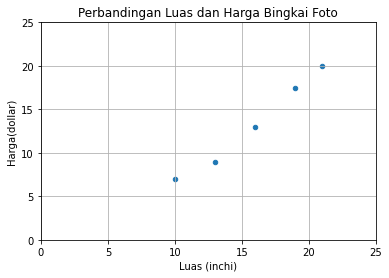

In [35]:
 import matplotlib.pyplot as plt

bingkaifoto_df.plot(kind='scatter', x='luas', y='harga')

plt.title('Perbandingan Luas dan Harga Bingkai Foto')
plt.xlabel('Luas (inchi)')
plt.ylabel('Harga(dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

In [37]:
import numpy as np

x = np.array(bingkaifoto_df['luas'])
y = np.array(bingkaifoto_df['harga'])

print(f'x: {x}')
print(f'y: {y}')


x: [10 13 16 19 21]
y: [10.  12.  15.  17.5 22. ]


In [40]:
X = x.reshape(-1,1)
X.shape

(5, 1)

In [41]:
X

array([[10],
       [13],
       [16],
       [19],
       [21]], dtype=int64)

In [48]:
from sklearn.linear_model import LinearRegression
    
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [53]:
X_vis = np.array([0, 25]).reshape(-1,1)
y_vis = model.predict(X_vis)

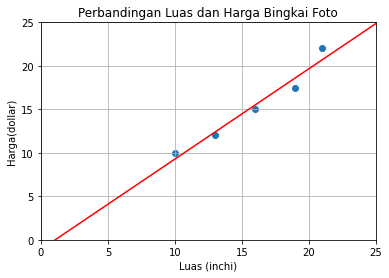

In [55]:
plt.scatter (X, y)
plt.plot(X_vis, y_vis, '-r')

plt.title('Perbandingan Luas dan Harga Bingkai Foto')
plt.xlabel('Luas (inchi)')
plt.ylabel('Harga(dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid()
plt.show()

In [57]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: -1.1015228426395964
slope: [1.03807107]


In [60]:
print(f'X:\n{X}\n')
print(f'X flatten: {X.flatten()}\n')
print(f'y:{y}')

X:
[[10]
 [13]
 [16]
 [19]
 [21]]

X flatten: [10 13 16 19 21]

y:[10.  12.  15.  17.5 22. ]


In [61]:
variance_x = np.var(X.flatten(), ddof=1)
print(f'variance: {variance_x}')
variance: 23.2

variance: 19.7


In [64]:
np.cov(X.flatten(),y)

array([[19.7 , 20.45],
       [20.45, 22.2 ]])

In [65]:
covariance_xy = np.cov(X.flatten(), y)[0][1]
print(f'covariance: {covariance_xy}')

covariance: 20.45


In [66]:
slope = covariance_xy / variance_x
print(f'slope: {slope}')

slope: 1.0380710659898478


In [67]:
intercept = np.mean(y) - slope + np.mean(X)
print(f'intercept: {intercept}')

intercept: 30.061928934010155


# Prediksi Harga Bingkai Foto Berdasarkan Ukuran Luas

In [70]:
luas_bingkaifoto = np.array([10,13,16]).reshape(-1,1)
luas_bingkaifoto

array([[10],
       [13],
       [16]])

In [71]:
prediksi_harga = model.predict(luas_bingkaifoto)
prediksi_harga

array([ 9.27918782, 12.39340102, 15.50761421])

In [73]:
for ls, hrg in zip(luas_bingkaifoto, prediksi_harga):
 print(f'Luas Bingkai Foto :{ls} prediksi harga : {hrg}') 

Luas Bingkai Foto :[10] prediksi harga : 9.279187817258881
Luas Bingkai Foto :[13] prediksi harga : 12.393401015228424
Luas Bingkai Foto :[16] prediksi harga : 15.507614213197968


In [74]:
X_train = np.array([10,13,16,19,21]).reshape(-1,1)
y_train = np.array([10,12,15,17.5,22])

X_test = np.array([11,13,15,19,21]).reshape(-1,1)
y_test = np.array([6,9,11.5,12,18])

In [75]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [77]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

R-squared: -0.1433974509811351
